In [14]:
# Step 1: Load the CSV
import pandas as pd
file_path = r'C:\Users\Dali\Desktop\zillow_home_values-zipcode.csv'
df = pd.read_csv(file_path)
print(df.head())

   RegionID  SizeRank  RegionName RegionType StateName State      City   
0     91940         0       77449        zip        TX    TX       NaN  \
1     91982         1       77494        zip        TX    TX       NaN   
2     93144         2       79936        zip        TX    TX   El Paso   
3     62080         3       11368        zip        NY    NY  New York   
4     62093         4       11385        zip        NY    NY  New York   

                                   Metro        CountyName  31012000  ...   
0   Houston-The Woodlands-Sugar Land, TX     Harris County  107261.0  ...  \
1   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  222569.0  ...   
2                            El Paso, TX    El Paso County   90009.0  ...   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County  188096.0  ...   
4  New York-Newark-Jersey City, NY-NJ-PA     Queens County  275983.0  ...   

   28022022  31032022  30042022  31052022  30062022  31072022  31082022   
0  261945.0  2676

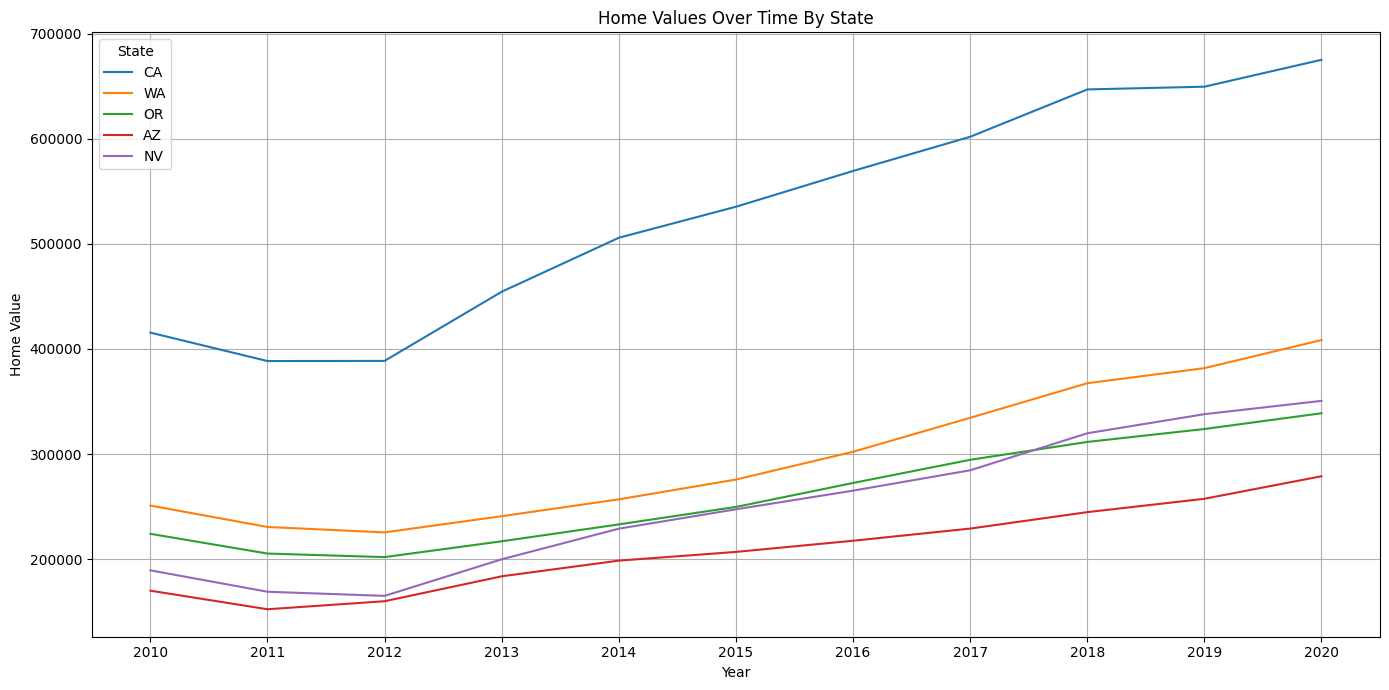

In [26]:
# Step 2: Prepare Data as a Time Series DataFrame
# Columns to keep (non-date columns)
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Create the time series long-form DataFrame with 'Date' and 'Home Value'
df_long = df.melt(id_vars=non_date_columns, var_name='Date', value_name='Home Value')

# Convert 'Date' column to datetime format
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%d%m%Y')

# Set 'Date' as the index
df_long.set_index('Date', inplace=True)

# Step 3: Filter Data for Specified States and Date Range
states_to_keep = ['CA', 'WA', 'OR', 'AZ', 'NV']
start_date = '2010-01-01'
end_date = '2020-12-31'

filtered_df = df_long[(df_long['State'].isin(states_to_keep)) & 
                      (df_long.index >= start_date) & 
                      (df_long.index <= end_date)].copy()

# Ensure 'Home Value' column is of numeric type
filtered_df['Home Value'] = pd.to_numeric(filtered_df['Home Value'], errors='coerce')

# Drop rows where 'Home Value' is NA (which would be due to non-numeric data)
filtered_df.dropna(subset=['Home Value'], inplace=True)

# Step 4: Save Processed Data for Tableau
# Create directory if it does not exist
os.makedirs('Data', exist_ok=True)
filtered_df.to_csv('Data/data-for-tableau.csv', index=True)

# Step 5: Resample Data and Plot
# We only need 'Home Value' and 'State' for resampling and plotting
# Note: 'Date' is already the index
filtered_df = filtered_df[['Home Value', 'State']]

# Resampling home values to yearly frequency and aggregating using mean
resampled_df = filtered_df.groupby('State').resample('AS').mean().reset_index()

# Plotting the resampled data through a line graph
plt.figure(figsize=(14, 7))

# Plot each state's data
for state in states_to_keep:
    state_data = resampled_df[resampled_df['State'] == state]
    plt.plot(state_data['Date'], state_data['Home Value'], label=state)

plt.title('Home Values Over Time By State')
plt.xlabel('Year')
plt.ylabel('Home Value')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()

# Saving the plot
plt.savefig('Data/home_values_by_state.png')

# Display the plot
plt.show()

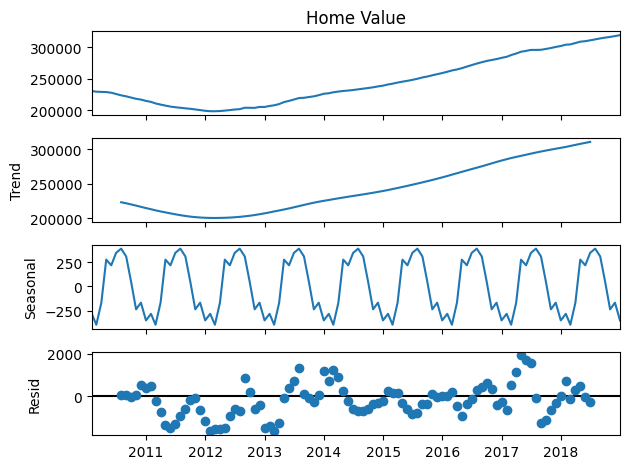

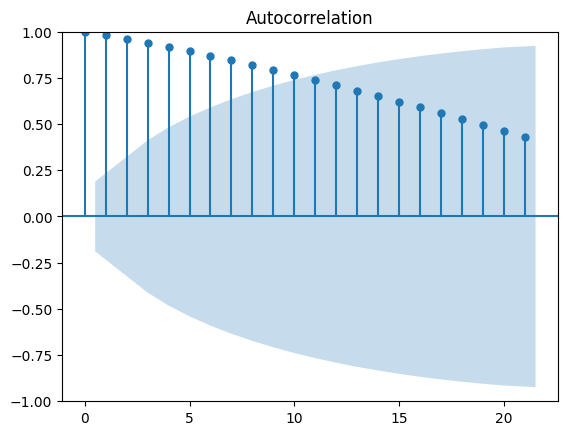

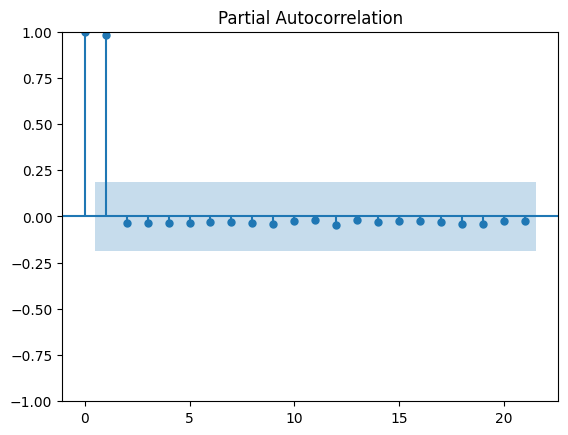

                                     SARIMAX Results                                      
Dep. Variable:                         Home Value   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -709.679
Date:                            Wed, 26 Jun 2024   AIC                           1429.357
Time:                                    22:50:15   BIC                           1441.451
Sample:                                01-31-2010   HQIC                          1434.216
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6160      0.190      3.235      0.001       0.243       0.989
ma.L1         -0.5866      0.193   

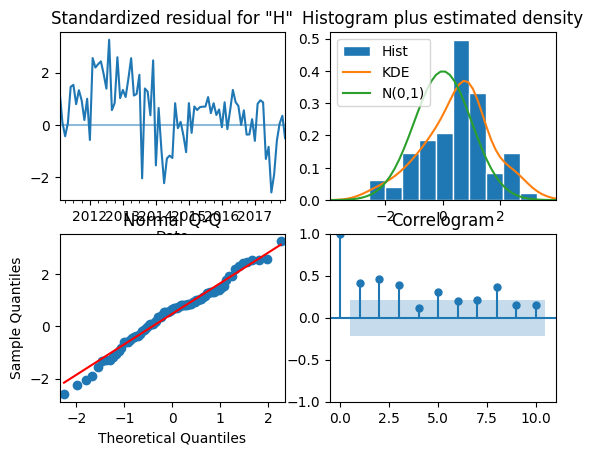

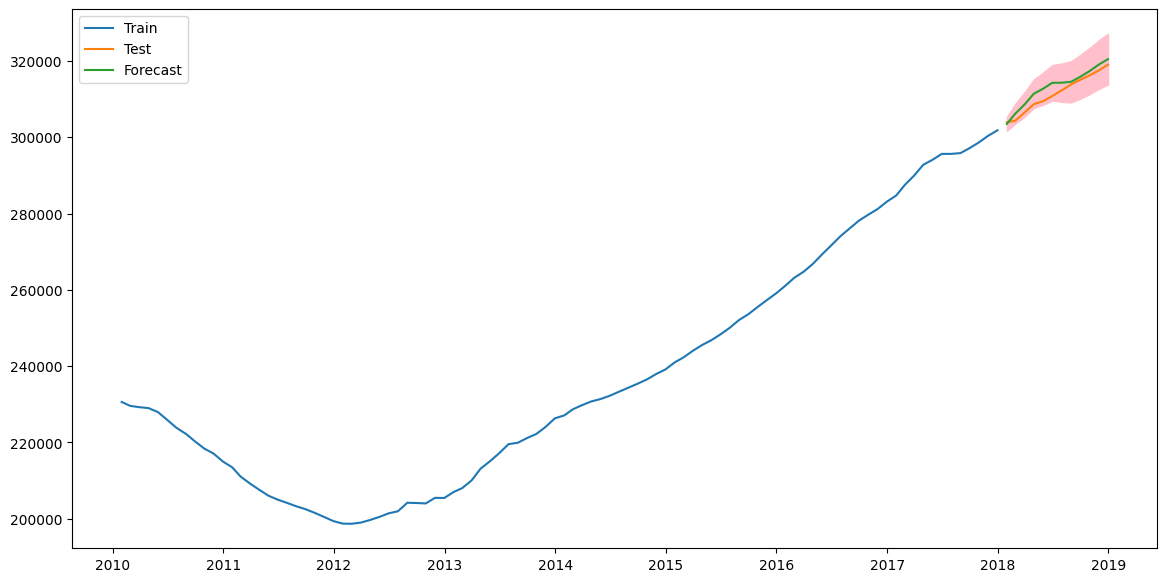

RMSE: 2022.6920250189285, MAE: 1786.294801839899
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1508.861, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1499.727, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1501.384, Time=0.07 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1501.549, Time=0.05 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1500.263, Time=0.07 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1506.272, Time=0.05 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1498.657, Time=0.49 sec
 ARIMA(0,2,0)(2,0,1)[12]             : AIC=1500.536, Time=0.78 sec
 ARIMA(0,2,0)(1,0,2)[12]             : AIC=1507.118, Time=0.59 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=1505.247, Time=0.09 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=1502.196, Time=0.08 sec
 ARIMA(0,2,0)(2,0,2)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=1499.483, Time=0.22 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC

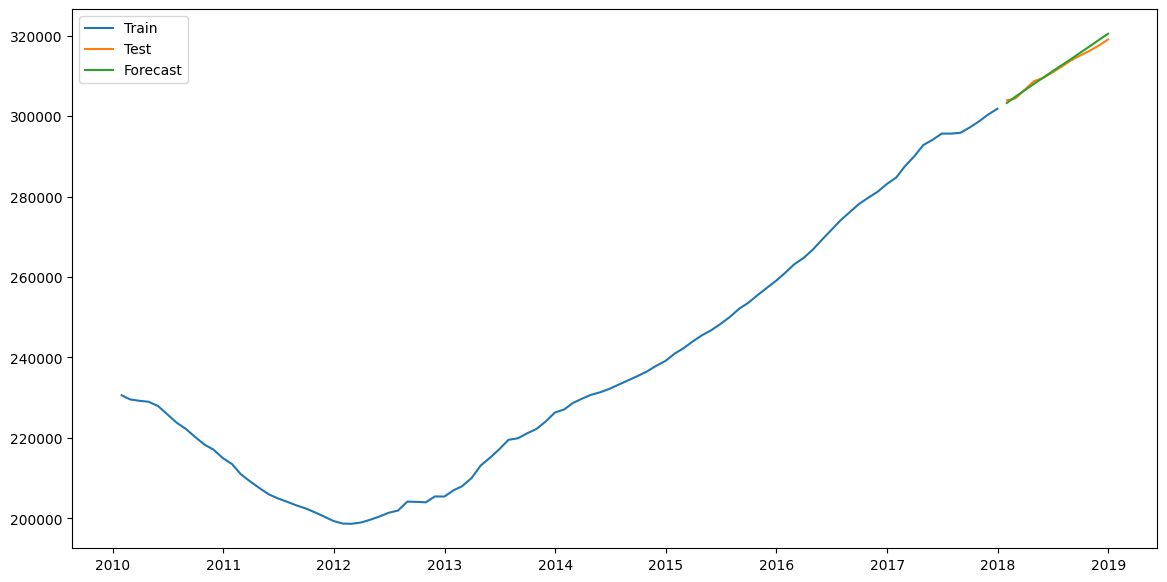

RMSE: 767.18779617849, MAE: 629.3361473381423


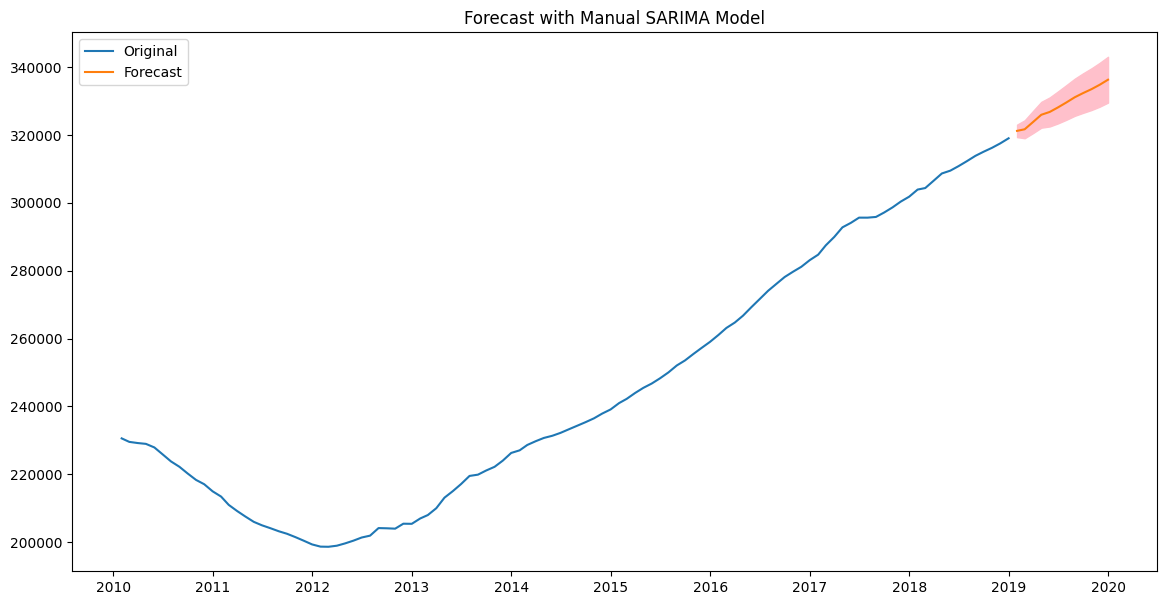

Forecast for final month: 336293.39673129085
Percent change over the 12-month forecast: 5.41%


(2019-01-31    321210.157814
 2019-02-28    321682.267023
 2019-03-31    323838.533916
 2019-04-30    325953.526150
 2019-05-31    326791.742774
 2019-06-30    328112.579867
 2019-07-31    329581.159266
 2019-08-31    331120.717715
 2019-09-30    332328.716898
 2019-10-31    333489.742597
 2019-11-30    334779.920441
 2019-12-31    336293.396731
 Freq: M, Name: predicted_mean, dtype: float64,
 'Manual SARIMA')

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

def preprocess_data():
    # Load the data from the first part
    df = pd.read_csv('Data/data-for-tableau.csv', index_col='Date', parse_dates=True)
    # Filter for the state of Oregon and relevant date range
    oregon_data = df[df['State'] == 'OR']
    oregon_data = oregon_data.loc['2000-01-31':'2018-12-31']

    # Resampling data to get monthly mean Home Value
    oregon_monthly = oregon_data['Home Value'].resample('M').mean()

    # Checking and addressing null values
    oregon_monthly = oregon_monthly.fillna(oregon_monthly.bfill())

    return oregon_monthly

def decompose_time_series(ts):
    decomposition = seasonal_decompose(ts, model='additive', period=12)
    decomposition.plot()
    plt.show()
    return decomposition

def plot_acf_pacf(ts):
    plot_acf(ts)
    plot_pacf(ts)
    plt.show()

def fit_manual_sarima(ts):
    # Split the data
    train = ts[:-12]
    test = ts[-12:]

    # Fit a manual SARIMA model
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_result = model.fit()

    # Model summary and diagnostics
    print(sarima_result.summary())
    sarima_result.plot_diagnostics()
    plt.show()

    # Forecast
    forecast = sarima_result.get_forecast(steps=12)
    forecasted_values = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Plotting the results
    plt.figure(figsize=(14, 7))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecasted_values.index, forecasted_values, label='Forecast')
    plt.fill_between(forecasted_values.index, 
                     conf_int.iloc[:, 0], 
                     conf_int.iloc[:, 1], 
                     color='pink')
    plt.legend()
    plt.show()

    # Metrics
    rmse = np.sqrt(mean_squared_error(test, forecasted_values))
    mae = mean_absolute_error(test, forecasted_values)
    print(f'RMSE: {rmse}, MAE: {mae}')

    return sarima_result

def fit_auto_arima(ts):
    # Split the data
    train = ts[:-12]
    test = ts[-12:]

    # Fit auto_arima model
    auto_model = auto_arima(train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
    auto_model.fit(train)

    # Model summary and diagnostics
    print(auto_model.summary())

    # Forecast
    forecast = auto_model.predict(n_periods=12)
    forecast_index = test.index

    # Plotting the results
    plt.figure(figsize=(14, 7))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast_index, forecast, label='Forecast')
    plt.legend()
    plt.show()

    # Metrics
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    print(f'RMSE: {rmse}, MAE: {mae}')

    return auto_model

# Update the function to handle the AIC extraction
def final_forecast(ts, manual_model, auto_model):
    # Extract AIC values and compare
    manual_aic = manual_model.aic
    auto_aic = auto_model.aic()
    
    best_model = manual_model if manual_aic < auto_aic else auto_model
    model_name = "Manual SARIMA" if best_model == manual_model else "Auto ARIMA"

    # Fit the final model on the entire dataset
    if model_name == "Manual SARIMA":
        final_model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
    else:
        final_model = auto_arima(ts, seasonal=True, m=12).fit(ts)

    # Forecast the next 12 months
    forecast = final_model.get_forecast(steps=12)
    forecasted_values = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Plotting the final forecast
    plt.figure(figsize=(14, 7))
    plt.plot(ts.index, ts, label='Original')
    plt.plot(forecasted_values.index, forecasted_values, label='Forecast')
    plt.fill_between(forecasted_values.index,
                     conf_int.iloc[:, 0],
                     conf_int.iloc[:, 1],
                     color='pink')
    plt.legend()
    plt.title(f'Forecast with {model_name} Model')
    plt.show()

    # Metrics Summary
    print(f'Forecast for final month: {forecasted_values[-1]}')
    percent_change = ((forecasted_values[-1] - ts.iloc[-1]) / ts.iloc[-1]) * 100
    print(f'Percent change over the 12-month forecast: {percent_change:.2f}%')

    return forecasted_values, model_name

# Load and preprocess the data
oregon_monthly = preprocess_data()

# 1. Decompose the time series
decompose_time_series(oregon_monthly)

# 2. Plot ACF and PACF
plot_acf_pacf(oregon_monthly)

# 3. Fit a manual SARIMA model
manual_model = fit_manual_sarima(oregon_monthly)

# 4. Fit with auto_arima
auto_model = fit_auto_arima(oregon_monthly)

# 5. Make the final forecast
final_forecast(oregon_monthly, manual_model, auto_model)

Manual SARIMA Model
- Model Type: SARIMAX(1, 1, 1)x(1, 1, 1, 12)
- Fitting Results: The model fits well, as shown by the AIC value of 1429.357. AIC (Akaike Information Criterion) is a measure used to compare models—the lower the better.
- Coefficients: The coefficients (ar.L1, ma.L1, ar.S.L12, ma.S.L12) indicate the relationships in the data.
- Errors & Significance: Standard errors and p-values tell us if the coefficients significantly impact the model.
- Performance Metrics: RMSE (2022.69) and MAE (1786.29) show prediction accuracy. Lower values indicate better performance.
- Forecast: Forecasted values for the final month of 336293.40 and a percent change of 5.41% over the 12-month forecast.

Auto ARIMA Model
- Best Model Found: ARIMA(0, 2, 1)(1, 0, 1)[12]
- Fitting Results: The AIC value is 1498.626, indicating how well the model fits.
- Coefficients & Significance: Shows how the moving average (ma.L1) and seasonal components (ar.S.L12, ma.S.L12) are used.
- Performance Metrics: RMSE (767.19) and MAE (629.34) indicate good predictive performance, better than the manual SARIMA model.

 Final Forecast
- Final Month Forecast: The forecast predicts an average home price of 336293.40 by the end of the 12-month period.
- Percent Change: The home prices are expected to increase by 5.41% over the next year.

 Code Explanation
 1. Data Preprocessing (`preprocess_data()`)
- Loads data from a CSV file.
- Filters for Oregon home values between 2000-2018.
- Resamples data to get monthly average home values.
- Handles missing values by filling them with the previous values.

 2. Time Series Decomposition (`decompose_time_series(ts)`)
- Analyzes the trend, seasonality, and residuals in the data.
- Helps decide whether to use a seasonal model.

 3. ACF and PACF Plots (`plot_acf_pacf(ts)`)
- Plots Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF).
- Helps identify the order of ARIMA models to use.

 4. Manual SARIMA Model (`fit_manual_sarima(ts)`)
- Splits the data into training and test sets.
- Creates and fits a SARIMA model manually.
- Forecasts next 12 months, plots results, and calculates performance metrics (RMSE, MAE).

 5. Auto ARIMA Model (`fit_auto_arima(ts)`)
- Splits the data into training and test sets.
- Uses `auto_arima` to find the best ARIMA model.
- Forecasts next 12 months, plots results, and calculates RMSE and MAE.

 6. Final Forecast (`final_forecast(ts, manual_model, auto_model)`)
- Compares AIC values of manual and auto models to choose the best one.
- Fits the chosen model on the entire dataset.
- Forecasts the next 12 months and plots the forecast.
- Shows forecast for the final month and percent change over the forecast period.

Finally, we used historical data of Oregon’s home prices to build two models (manual SARIMA and auto ARIMA) to predict future home prices. The auto ARIMA model performed better based on RMSE and MAE metrics. The forecast predicts average home prices will increase by 5.41% over the next year, ending at an average price of $336,293.40. The process involved loading data, preprocessing it, performing time series analysis, fitting and comparing models, and making future forecasts.

This script automates the entire process and provides a reliable forecast based on past trends and patterns